In [2]:
import pandas as pd

In [3]:
df_dpt = pd.read_csv("df_dpt.csv")

In [4]:
df_dpt.columns

Index(['ville', 'code_postal', 'region', 'departement', 'zone',
       'grand_secteur', 'secteur_na17', 'secteur_na38', 'secteur_na88',
       'année', 'nb_staff', 'nb_etablissements'],
      dtype='object')

In [5]:
# Vérifier les valeurs manquantes dans les colonnes concernées
print(df_dpt[['nb_staff', 'nb_etablissements']].isnull().sum())

# Vérifier les valeurs infinies (si présentes)
print(df_dpt[['nb_staff', 'nb_etablissements']].replace([float('inf'), -float('inf')], float('nan')).isnull().sum())


nb_staff             132
nb_etablissements      0
dtype: int64
nb_staff             132
nb_etablissements      0
dtype: int64


In [8]:
# Convertir la colonne 'année' en entier
df_dpt['année'] = df_dpt['année'].astype(int)

# Remplacer les valeurs NaN par 0 et convertir en entier
df_dpt['nb_staff'] = df_dpt['nb_staff'].fillna(0).astype(int)
df_dpt['nb_etablissements'] = df_dpt['nb_etablissements'].fillna(0).astype(int)

# Vérification
print(df_dpt[['année', 'nb_staff', 'nb_etablissements']].dtypes)



année                int64
nb_staff             int64
nb_etablissements    int64
dtype: object


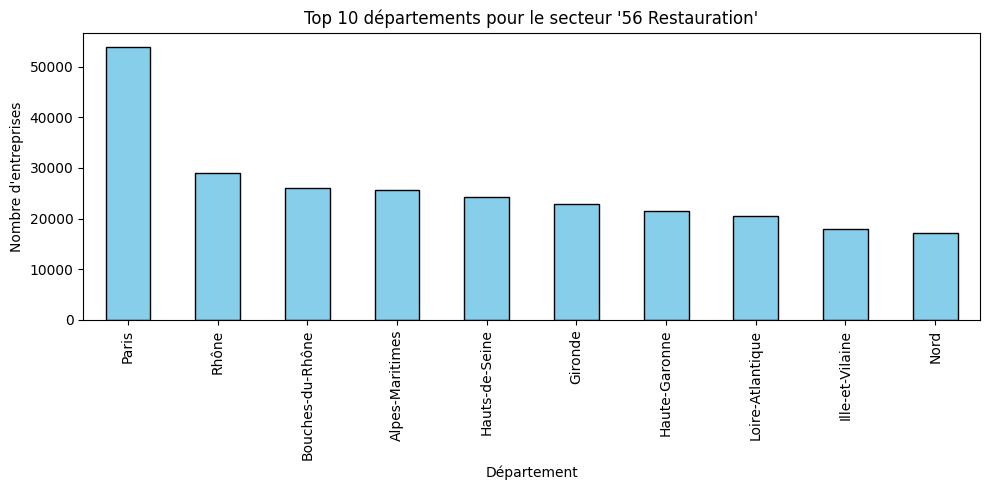

In [9]:
import matplotlib.pyplot as plt

# Filtrer pour un secteur spécifique
secteur_specifique = "56 Restauration"  # Exemple : secteur ciblé

# Filtrer le DataFrame pour le secteur spécifique
df_filtre = df_dpt[df_dpt['secteur_na88'] == secteur_specifique]

# Agréger le nombre d'entreprises par département
top_departements = (
    df_filtre.groupby('departement')['nb_etablissements']
    .sum()
    .nlargest(10)  # Les 10 plus grands
)

# Vérifier si des données existent pour éviter une erreur
if top_departements.empty:
    print(f"Aucune donnée trouvée pour le secteur '{secteur_specifique}'.")
else:
    # Visualisation en barres
    top_departements.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
    plt.title(f"Top 10 départements pour le secteur '{secteur_specifique}'")
    plt.xlabel('Département')
    plt.ylabel("Nombre d'entreprises")
    plt.tight_layout()
    plt.show()



C:\Users\X415\AppData\Local\Temp\ipykernel_40512\175027445.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


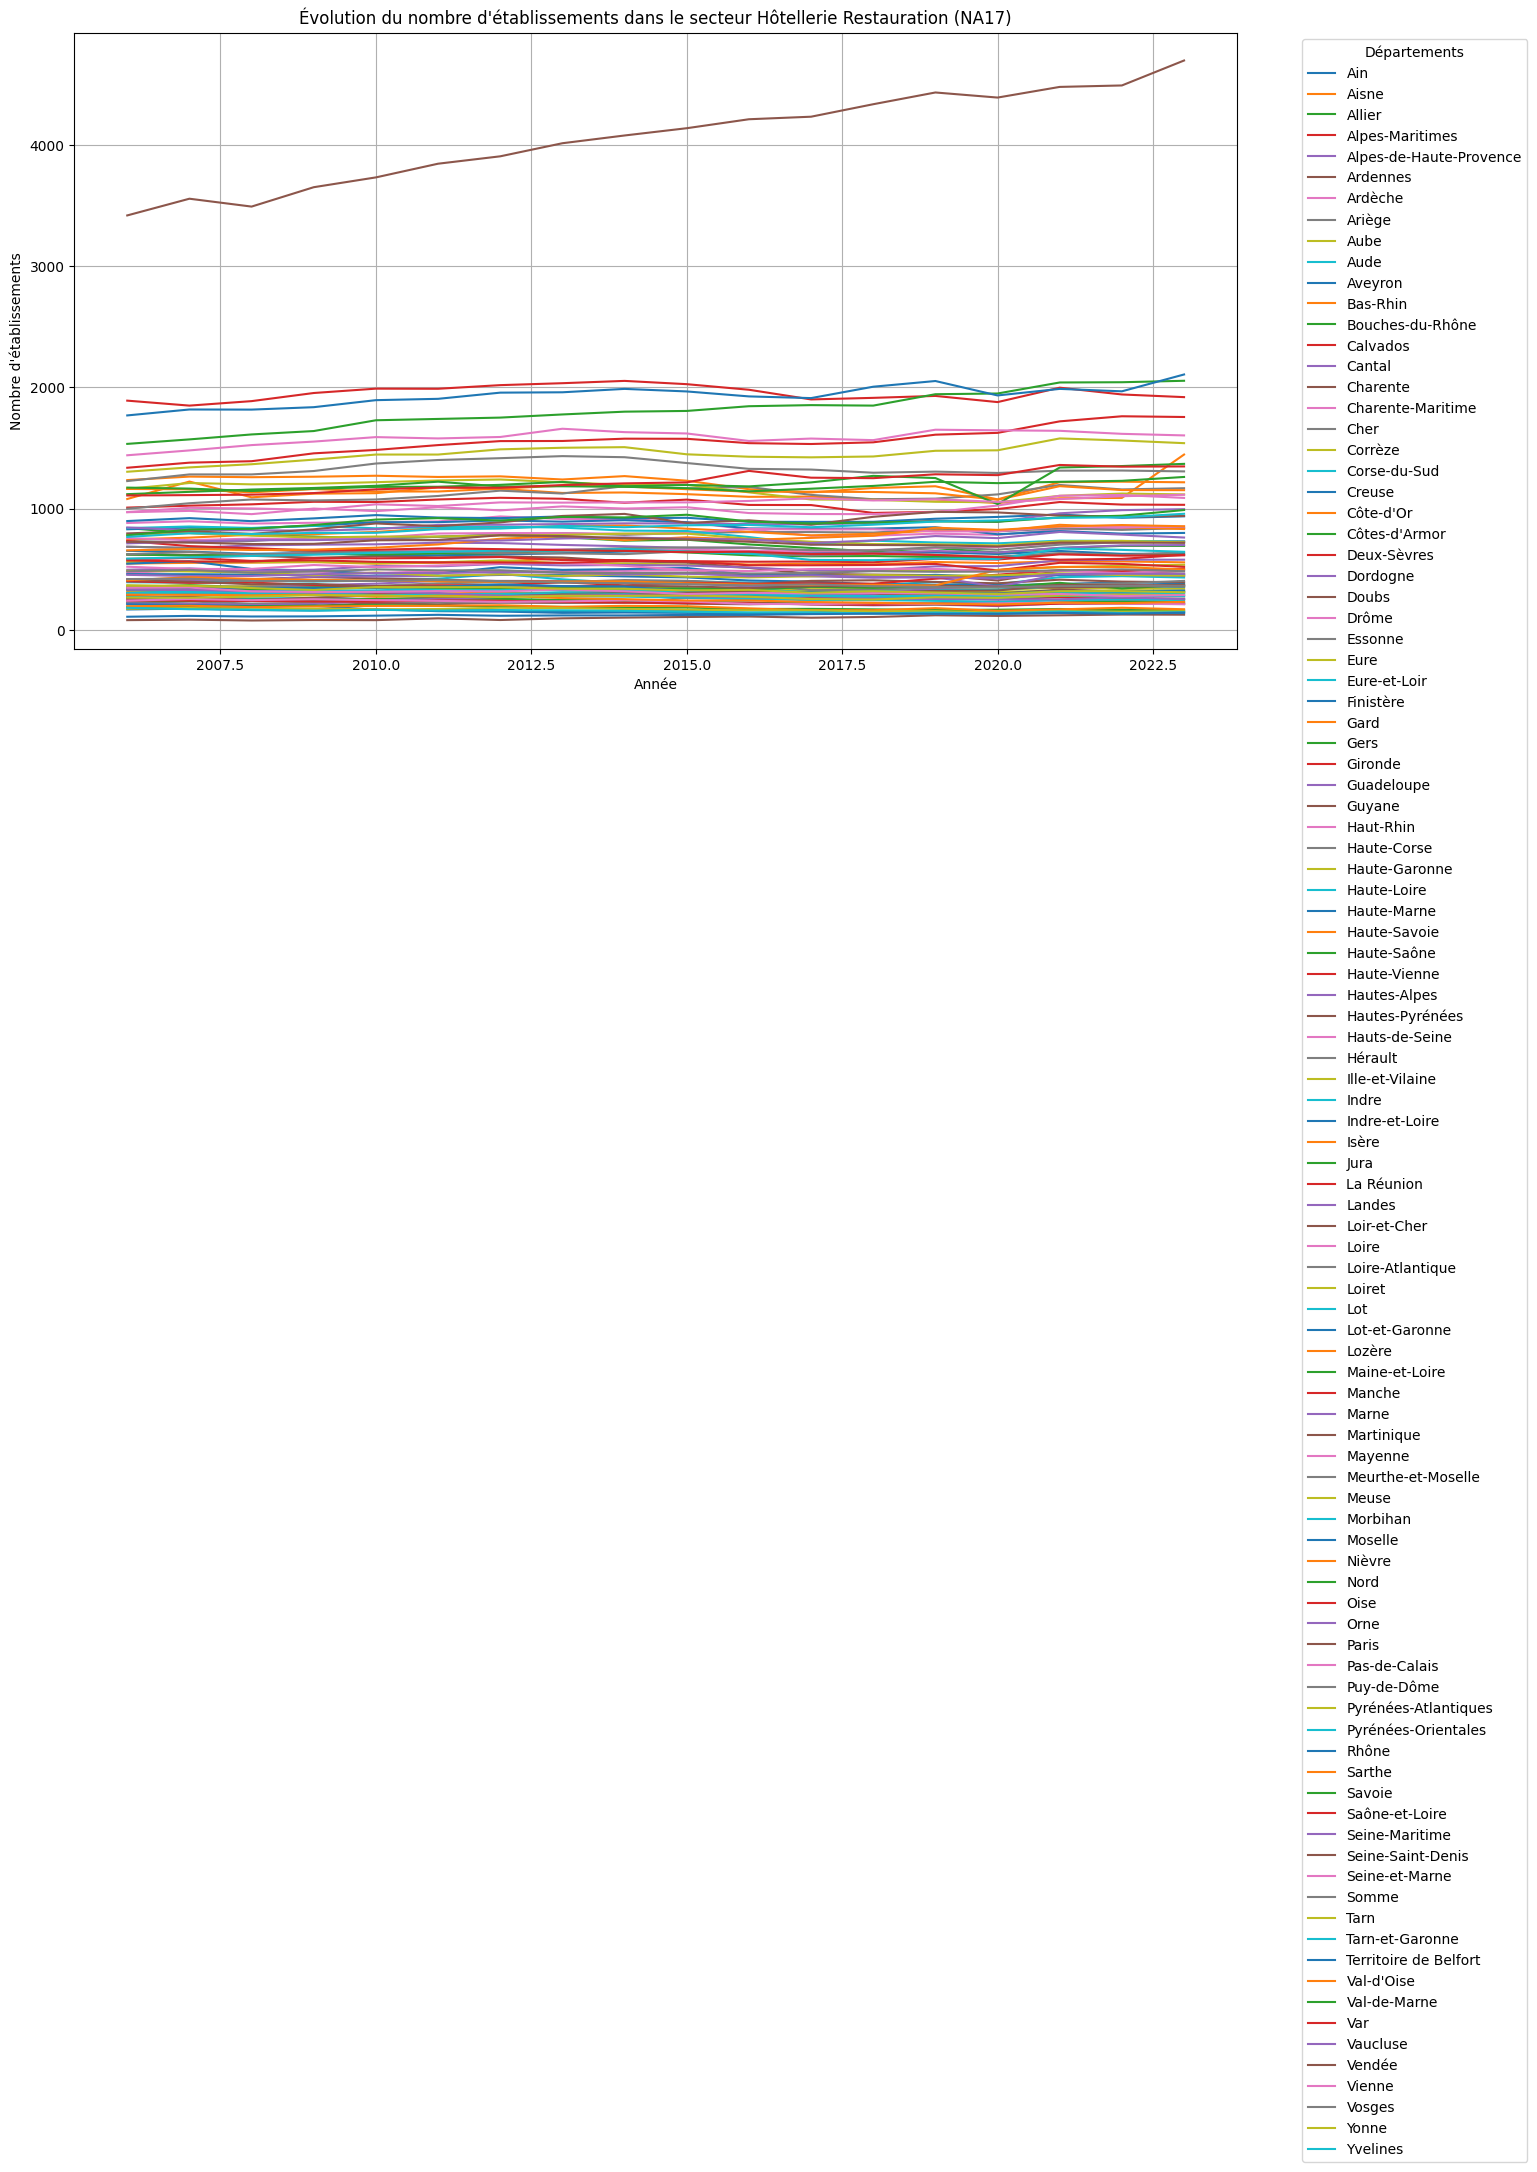

In [14]:
import matplotlib.pyplot as plt

# Convertir la colonne 'année' en entier
df_dpt['année'] = df_dpt['année'].astype(int)

# Filtrer pour le secteur spécifique "Hôtellerie Restauration" dans secteur_na17
secteur_na17_specifique = "IZ Hébergement et restauration"  # Exemple : secteur ciblé
df_filtre = df_dpt[df_dpt['secteur_na17'] == secteur_na17_specifique]

# Agréger les données par année et département
evolution_etablissements = (
    df_filtre.groupby(['année', 'departement'])['nb_etablissements']
    .sum()
    .unstack()  # Chaque département devient une colonne
)

# Vérifier si des données existent
if evolution_etablissements.empty:
    print(f"Aucune donnée trouvée pour le secteur '{secteur_na17_specifique}'.")
else:
    # Visualisation des courbes
    plt.figure(figsize=(15, 8))
    for col in evolution_etablissements.columns:
        plt.plot(evolution_etablissements.index, evolution_etablissements[col], label=col)

    plt.title("Évolution du nombre d'établissements dans le secteur Hôtellerie Restauration (NA17)")
    plt.xlabel('Année')
    plt.ylabel("Nombre d'établissements")
    plt.legend(title='Départements', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\X415\AppData\Local\Temp\ipykernel_40512\2195094974.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


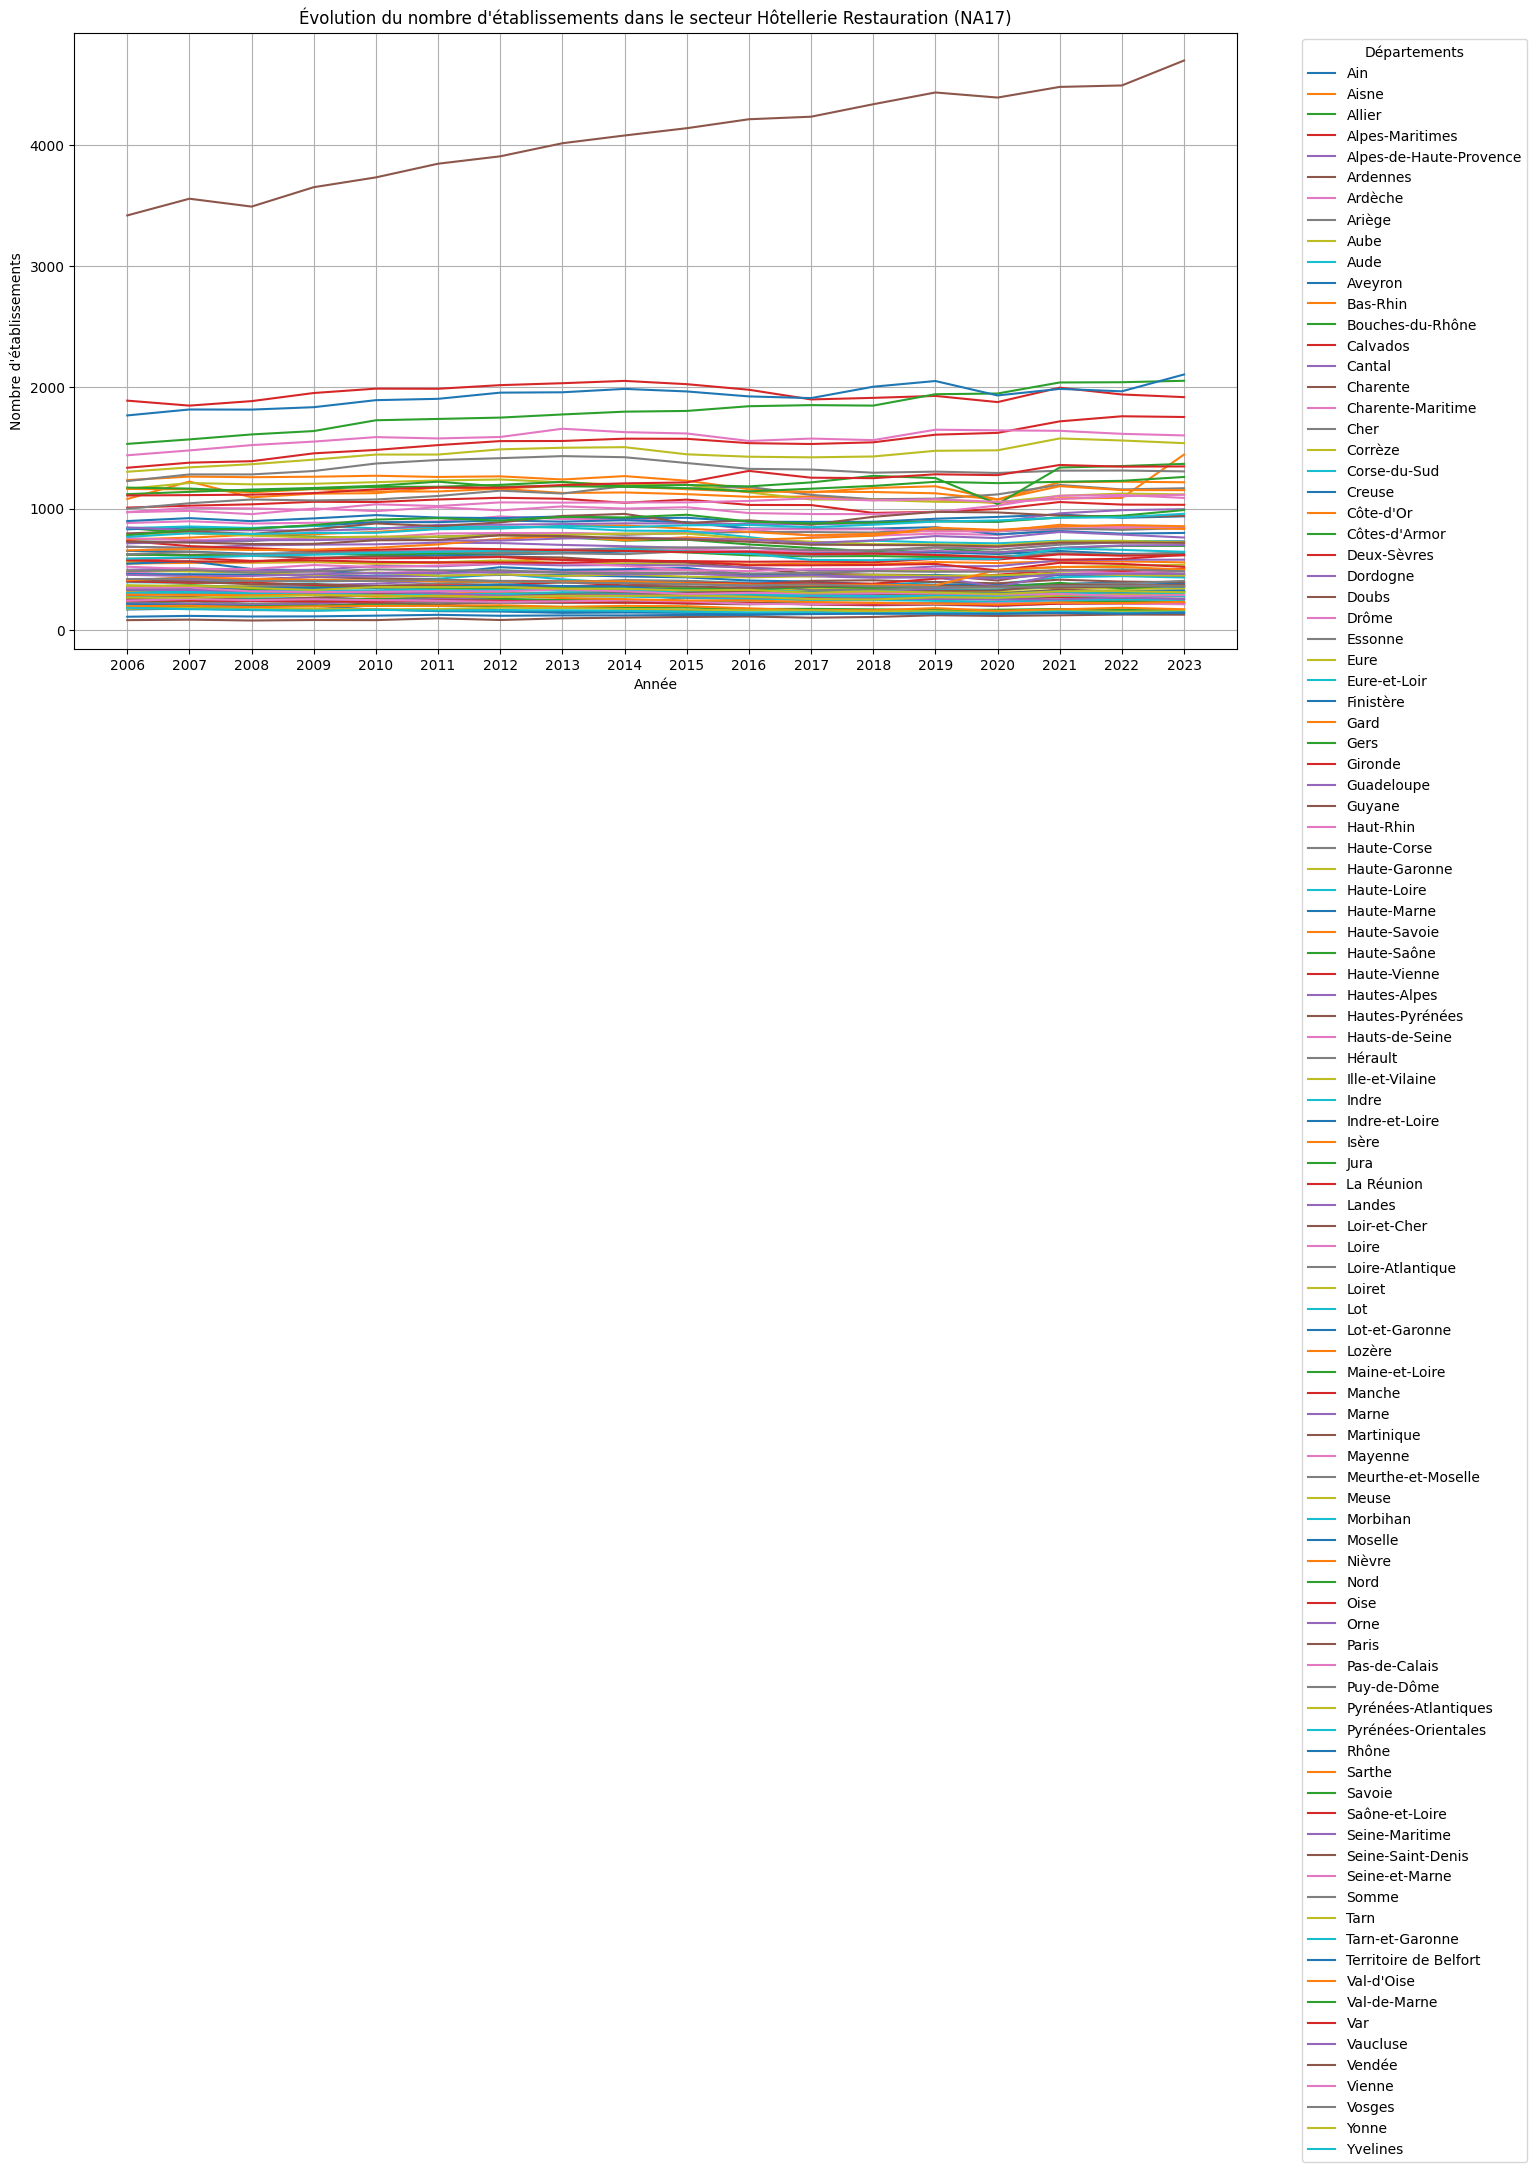

In [15]:
import matplotlib.pyplot as plt

# Définir les années disponibles comme des entiers
annees = sorted(df_dpt['année'].unique())  # Extraire les années uniques et les trier

# Votre code de visualisation
plt.figure(figsize=(15, 8))
for col in evolution_etablissements.columns:
    plt.plot(evolution_etablissements.index, evolution_etablissements[col], label=col)

# Définir les ticks de l'axe des X avec des années entières
plt.xticks(ticks=annees, labels=[str(int(a)) for a in annees])

# Ajouter des titres et des légendes
plt.title("Évolution du nombre d'établissements dans le secteur Hôtellerie Restauration (NA17)")
plt.xlabel('Année')
plt.ylabel("Nombre d'établissements")
plt.legend(title='Départements', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



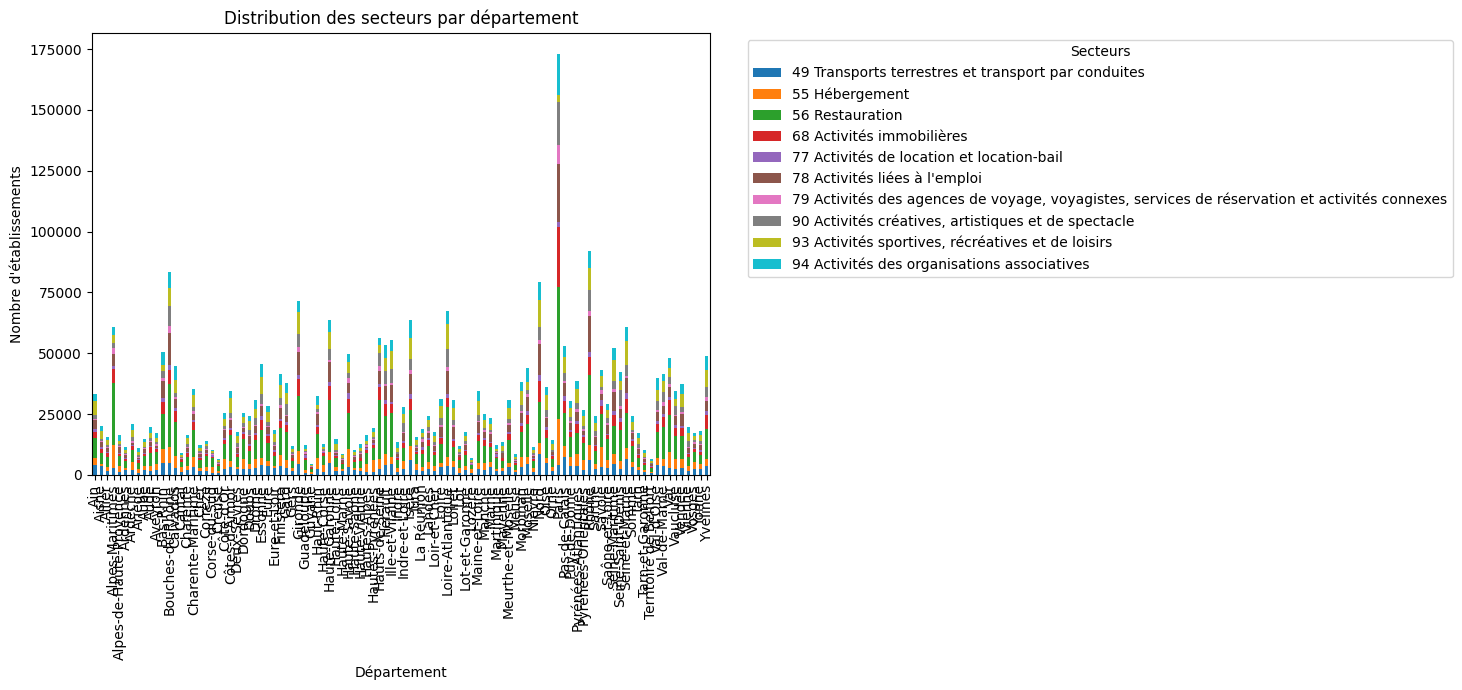

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Agréger les données par département et secteur
secteurs_par_departement = df_dpt.groupby(['departement', 'secteur_na88'])['nb_etablissements'].sum().unstack()

# Visualiser sous forme de diagramme empilé
secteurs_par_departement.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Distribution des secteurs par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'établissements")
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


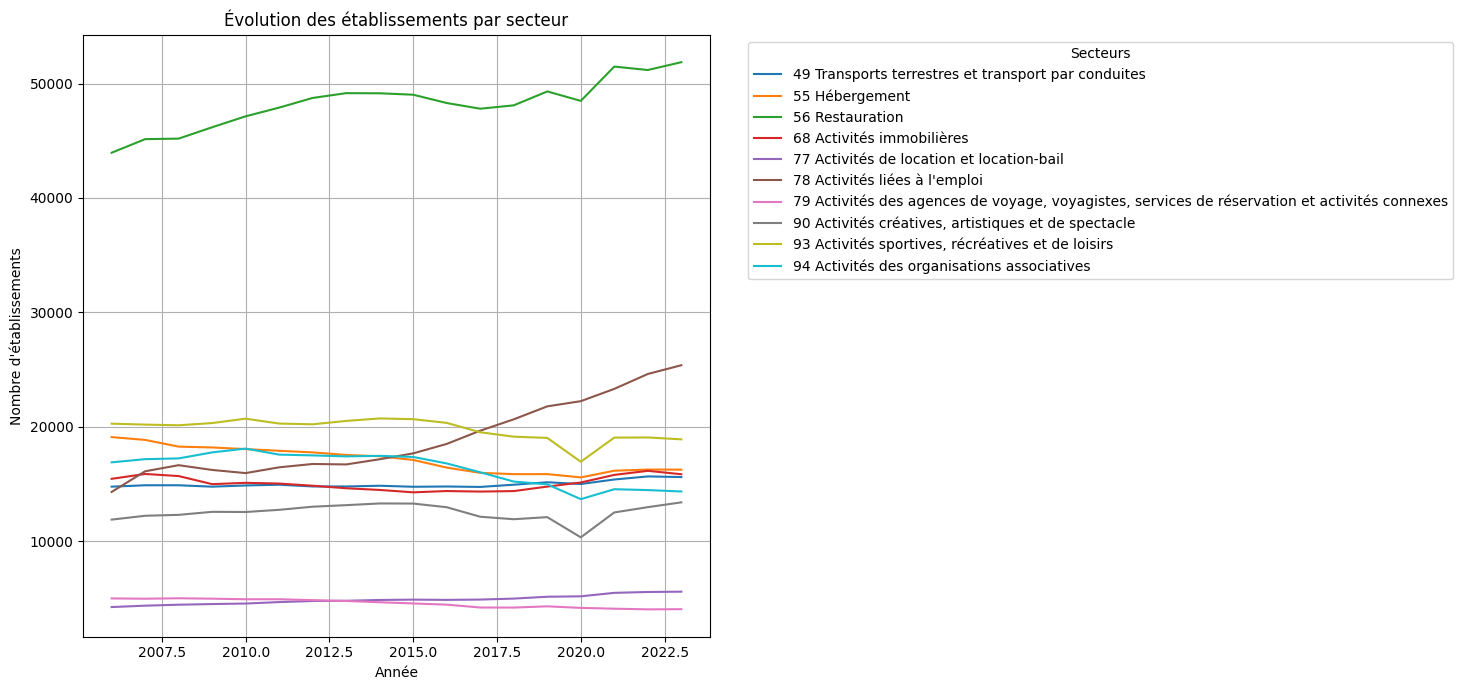

In [18]:
# Agréger les données par année et secteur
evolution_secteurs = df_dpt.groupby(['année', 'secteur_na88'])['nb_etablissements'].sum().unstack()

# Visualiser l'évolution de plusieurs secteurs
plt.figure(figsize=(15, 7))
for col in evolution_secteurs.columns:
    plt.plot(evolution_secteurs.index, evolution_secteurs[col], label=col)

plt.title("Évolution des établissements par secteur")
plt.xlabel("Année")
plt.ylabel("Nombre d'établissements")
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\X415\AppData\Local\Temp\ipykernel_40512\1623819881.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


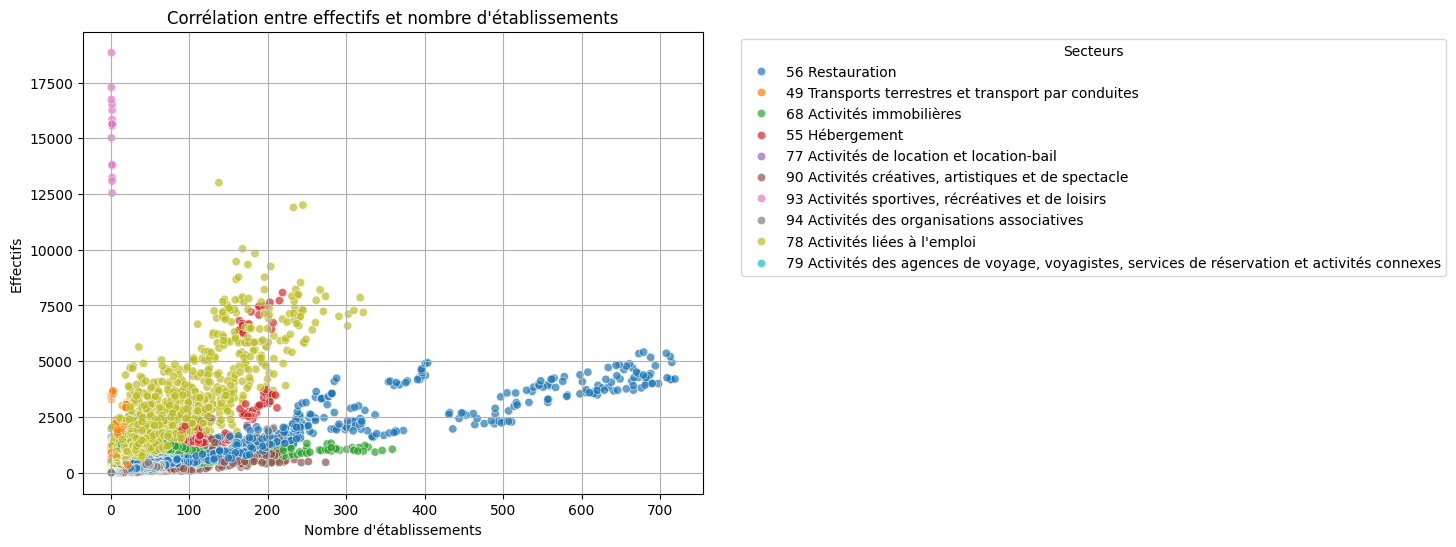

In [20]:
import seaborn as sns

# Visualisation en scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dpt, x='nb_etablissements', y='nb_staff', hue='secteur_na88', alpha=0.7)
plt.title("Corrélation entre effectifs et nombre d'établissements")
plt.xlabel("Nombre d'établissements")
plt.ylabel("Effectifs")
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



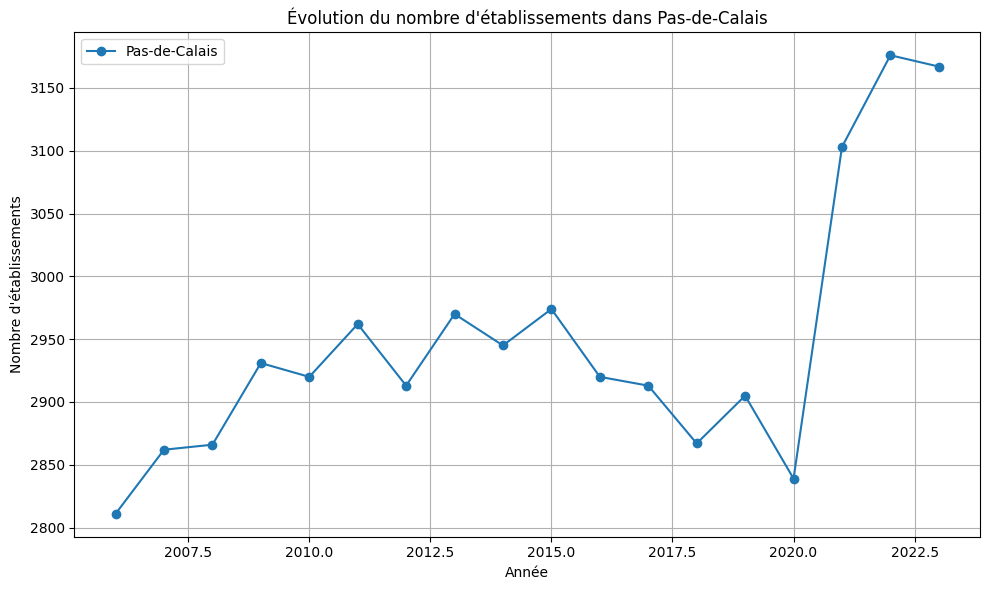

In [23]:
import matplotlib.pyplot as plt

# Filtrer les données pour le département de Pas-de-Calais
departement_cible = "Pas-de-Calais"
df_departement = df_dpt[df_dpt['departement'] == departement_cible]

# Agréger les données par année
evolution_etablissements = df_departement.groupby('année')['nb_etablissements'].sum()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(evolution_etablissements.index, evolution_etablissements.values, marker='o', label=departement_cible)
plt.title(f"Évolution du nombre d'établissements dans {departement_cible}")
plt.xlabel("Année")
plt.ylabel("Nombre d'établissements")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



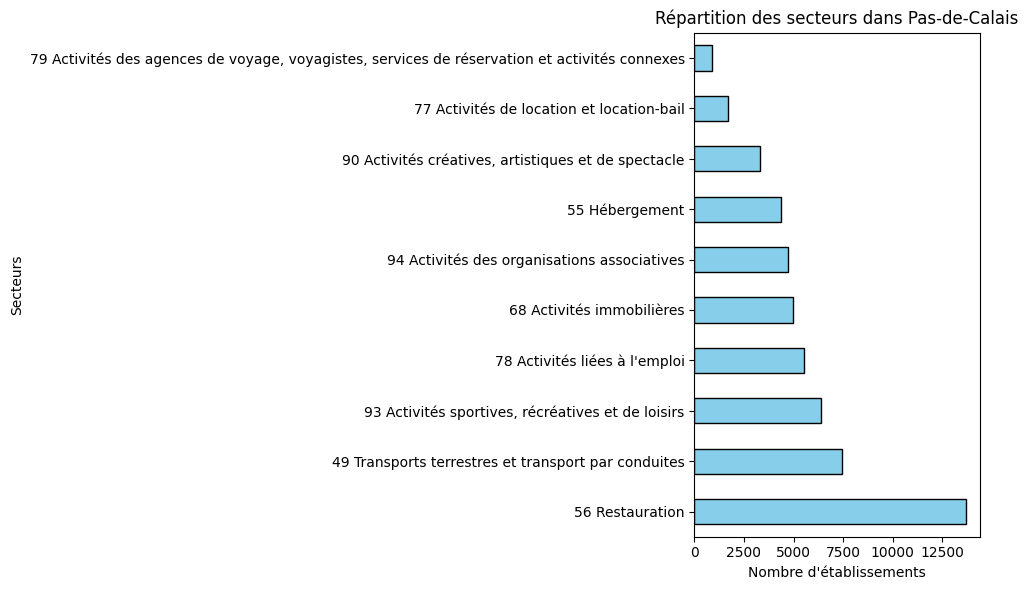

In [24]:
# Répartition des secteurs pour le département spécifique
secteurs_departement = df_departement.groupby('secteur_na88')['nb_etablissements'].sum().sort_values(ascending=False)

# Visualisation
secteurs_departement.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title(f"Répartition des secteurs dans {departement_cible}")
plt.xlabel("Nombre d'établissements")
plt.ylabel("Secteurs")
plt.tight_layout()
plt.show()


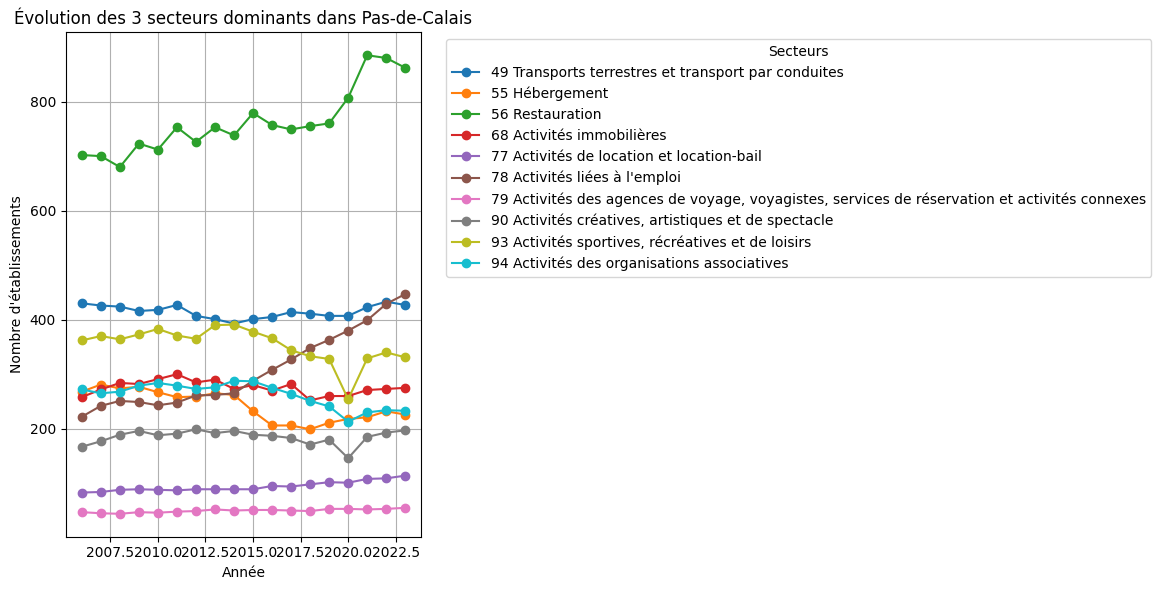

In [27]:
# Identifier les 3 secteurs principaux
top_3_secteurs = secteurs_departement.nlargest(10).index

# Filtrer les données pour ces secteurs
df_departement_top_secteurs = df_departement[df_departement['secteur_na88'].isin(top_3_secteurs)]

# Agréger les données par année et secteur
evolution_top_secteurs = df_departement_top_secteurs.groupby(['année', 'secteur_na88'])['nb_etablissements'].sum().unstack()

# Visualisation
plt.figure(figsize=(12, 6))
for secteur in evolution_top_secteurs.columns:
    plt.plot(evolution_top_secteurs.index, evolution_top_secteurs[secteur], marker='o', label=secteur)

plt.title(f"Évolution des 3 secteurs dominants dans {departement_cible}")
plt.xlabel("Année")
plt.ylabel("Nombre d'établissements")
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


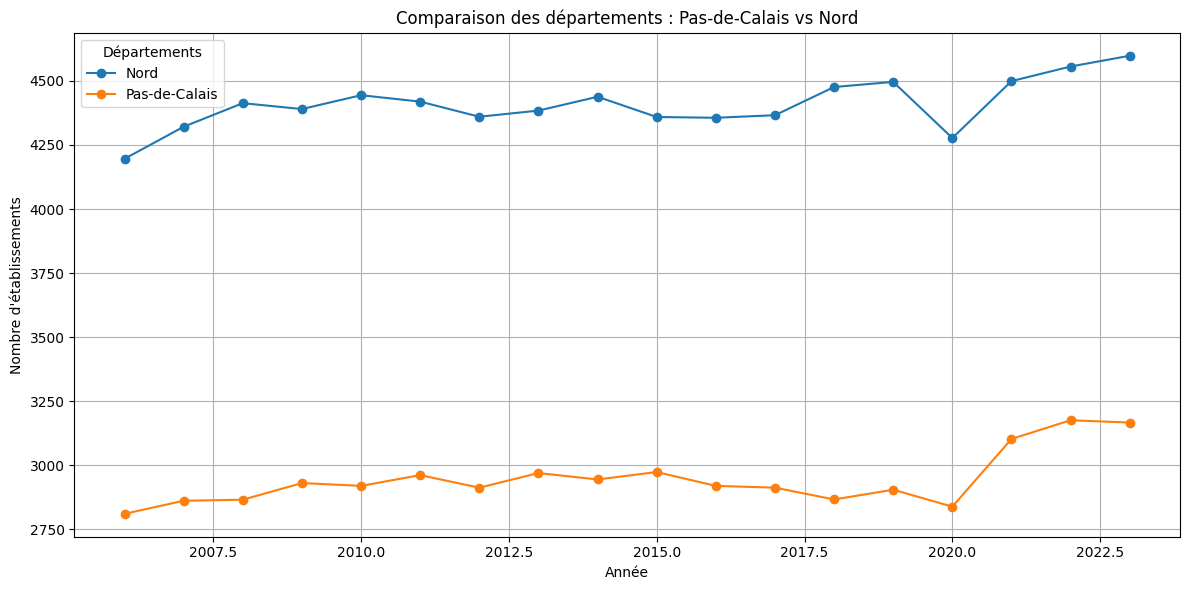

In [28]:
# Filtrer pour plusieurs départements
departements_cibles = ["Pas-de-Calais", "Nord"]
df_departements = df_dpt[df_dpt['departement'].isin(departements_cibles)]

# Agréger les données par année et département
evolution_comparaison = df_departements.groupby(['année', 'departement'])['nb_etablissements'].sum().unstack()

# Visualisation
plt.figure(figsize=(12, 6))
for dept in evolution_comparaison.columns:
    plt.plot(evolution_comparaison.index, evolution_comparaison[dept], marker='o', label=dept)

plt.title("Comparaison des départements : Pas-de-Calais vs Nord")
plt.xlabel("Année")
plt.ylabel("Nombre d'établissements")
plt.legend(title="Départements")
plt.grid(True)
plt.tight_layout()
plt.show()
